In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import debugraphic
import matplotlib
import matplotlib.pyplot as plt
import pylab 
import sound_definition
import midinote
import bopnizer

### a concept of bridge behind the branch construction
a bridge consists of 1 or -1 and is interpreted as a sequence of the difference 

In [3]:
# generate bridges length of notes <= 5 
bridgearr, sumq, lenq, rootq=bopnizer.generate_bridges(4)
# select length = 3 and sum = 1
bridgearr[(sumq==1)*(lenq==3)]

array([array([ 1, -1,  1]), array([ 1,  1, -1]), array([-1,  1,  1])], dtype=object)

In [4]:
### The bridge is interpreted as the difference and is used to generate branches in bopnizer.py

### connected branch
the connected branch connects two different notes by a sequence of semitones

In [5]:
# default is here
q=bopnizer.connected_branch([33,35])

#you can specify optionally 
#bridgearr, sumq, lenq, rootq=bopnizer.generate_bridges(4)
#q=bopnizer.connected_branch([33,33],bridgearr=bridgearr, sumq=sumq, lenq=lenq, rootq=rootq)

#or just specify, length of max bridge
#q=bopnizer.connected_branch([33,33],n=6)

midinote.sentence_midinotes(q)+" "+midinote.sentence_midinotes(35)

'A Bb B'

### open branch
the open branch is the sequence of semitones that approache a reference note

In [6]:
q=bopnizer.open_branch(36)
"("+midinote.sentence_midinotes(q)+")->"+midinote.sentence_midinotes(36)

'(D Db C B)->C'

In [7]:
q=bopnizer.open_branch(36,4,2,-1)
"("+midinote.sentence_midinotes(q)+")->"+midinote.sentence_midinotes(36)
# length of the first branch is 4 
# length of the second (closer) branch is 2 
# -1 specifies the second branch exhibits the approach from the lower note
# Hence, the above function should return (X X X Db Y B)->C' 


'(E Eb D Db C B)->C'

##### The below examples demonstrate that the open_branch can generate a variety of approaching phrases 

In [8]:
# one note approach from an upper note
q=bopnizer.open_branch(36,0,1,1)
"("+midinote.sentence_midinotes(q)+")->"+midinote.sentence_midinotes(36)

'(Db)->C'

In [9]:
#  note approach from a lower note
q=bopnizer.open_branch(36,0,1,-1)
"("+midinote.sentence_midinotes(q)+")->"+midinote.sentence_midinotes(36)

'(B)->C'

In [10]:
# three notes + one note approach from upper and lower notes
q=bopnizer.open_branch(36,3,1,-1)
"("+midinote.sentence_midinotes(q)+")->"+midinote.sentence_midinotes(36)

'(Eb D Db B)->C'

## Injecting the branch 

To inject the branch, the neighboring note in front of the target note (scout) and the lenght of the rest between these two notes are required. 

In [11]:
# extract non rest pair (nrpnote, npdur), internotes rest length (irl)

In [12]:
nrpnote, nrpdur, interrest=bopnizer.extract_pairs(testnote, testdur)

NameError: name 'testnote' is not defined

In [64]:
#neighboring notes pair [scout, target note]
nrpnote

array([[None, 30],
       [30, 33],
       [33, 35],
       [35, 30],
       [30, 33]], dtype=object)

In [65]:
#neighboring dur pair [scout, target note] 
nrpdur

array([[None, 120],
       [120, 120],
       [120, 118],
       [118, 120],
       [120, 120]], dtype=object)

In [35]:
#internotes rest
interrest

[120, 0, 2, 240, 0]

### non-destructive branch injection

In [85]:
def injbranch_nondest(branch,newdur,newnote,targetdur,target,irest,branchdur):
    numrest=-64
    # the original notes
    newdur.append(targetdur)
    newnote.append(target)  
    frontdur=irest
    totalbdur=len(branch)*branchdur

    # the branch
    if frontdur>=totalbdur:
        for j in range(0,len(branch)):
            newdur.append(branchdur)
            newnote.append(branch[j])
    else:
        newdur.append(frontdur)
        newnote.append(numrest)

    # the rest rest
    if frontdur>totalbdur:
        newdur.append(frontdur-totalbdur)
        newnote.append(numrest)
    return

In [90]:
#inverse ordering processing
newnote=[]
newdur=[]

for i in range(0,len(nrpair))[::-1]:
    branchdur=60
    branch=bopnizer.open_branch(nrpnote[i][1],1,1,-1)
    injbranch_nondest(branch,newdur,newnote,nrpdur[i][1],nrpnote[i][1],interrest[i],branchdur)

newdur=newdur[::-1]
newnote=newnote[::-1]

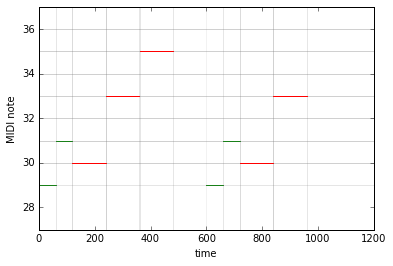

In [91]:
## test notes
testnote=np.array([[-64],[30],[33],[-64],[35],[-64],[-64],[30],[33]])
testdur=np.array([120,120,120,2,118,120,120,120,120])
fig = plt.figure()
ax=fig.add_subplot(111)

debugraphic.plot_midiseq(ax,newnote, newdur,"green") 
debugraphic.plot_midiseq(ax,testnote, testdur) 
pylab.ylim(27,37)
pylab.xlim(0,1200)
plt.show()


In [ ]:
### front destructive injection
# seq: target + allowed target list of dustruction 
def injbranch_frontdest(branch,newdur,newnote,targetdurseq,targetseq,irestseq,branchdur):
    numrest=-64
    frontdur=irest[-1]
    totalbdur=len(branch)*branchdur

    # non-destructive case
    #if frontdur < totalbdur:
    #    injbranch_nondest(branch,newdur,newnote,targetdurseq[0],targetseq[0],irestseq[0],branchdur)
    #    return
    
    # the original notes
    newdur.append(targetdur)
    newnote.append(target)  
        
    for j in range(0,len(branch)): 
        newdur.append(branchdur)
        newnote.append(branch[j])     
        totaldur=totaldur-branchdur
        if frontdur < totaldur
            frontdur=frontdur+
    
    
    # the branch
    newdur.append(branchdur)
    newnote.append(branch[j])

    
    # the rest rest
    if frontdur>totalbdur:
        newdur.append(frontdur-totalbdur)
        newnote.append(numrest)

#inverse ordering processing
newnote=[]
newdur=[]
an=3 # limit of destruction
for i in range(0,len(nrpair))[::-1]:
    branchdur=60
    branch=bopnizer.open_branch(nrpnote[i][1],1,1,-1)
    iv=max(i-an,-1)
    injbranch_frontdest(branch,newdur,newnote,nrpdur[iv:i,1],nrpnote[iv:i,1],interrest[iv:i],branchdur)

newdur=newdur[::-1]
newnote=newnote[::-1]

In [99]:
nrpdur[0:2,1]

array([120, 120], dtype=object)

In [122]:
an=3
for i in range(0,len(nrpair))[::-1]:
    iv=max(i-an,-1)
    print i, iv
    print interrest[iv+1:i+1]


4 1
[2, 240, 0]
3 0
[0, 2, 240]
2 -1
[120, 0, 2]
1 -1
[120, 0]
0 -1
[120]


In [121]:
interrest

[120, 0, 2, 240, 0]